# Ad Click Prediction

#### The goal of the project is to Predict who is likely going to click on the Ad on a website based on the features of a user.
#### This notebook will contain exploratory data analysis along with classification models related to this project.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.listdir()

['.ipynb_checkpoints', 'Ad Click Prediction.ipynb', 'advertising.csv']

### Loading data

In [2]:
data = pd.read_csv('advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [12]:
data.shape

(1000, 10)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [14]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [15]:
data.rename(columns={'Daily Time Spent on Site':'Time Spent','Daily Internet Usage':'Internet Usage','Clicked on Ad':'outcome'},inplace=True)


In [16]:

data.columns = data.columns.str.lower()
data.head()

,time spent,age,area income,internet usage,ad topic line,city,male,country,timestamp,outcome
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Data Vizualisation (EDA)

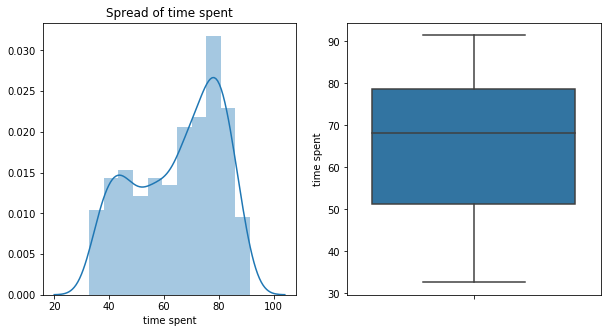

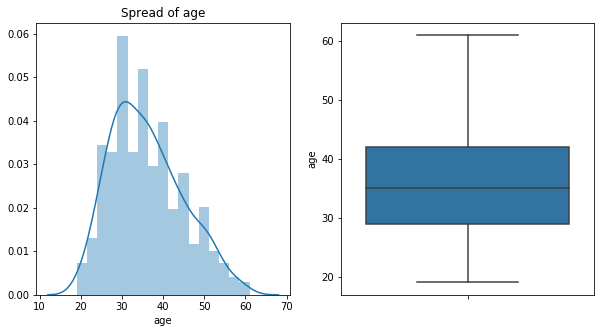

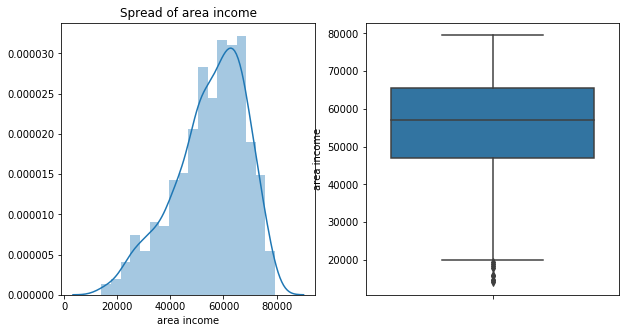

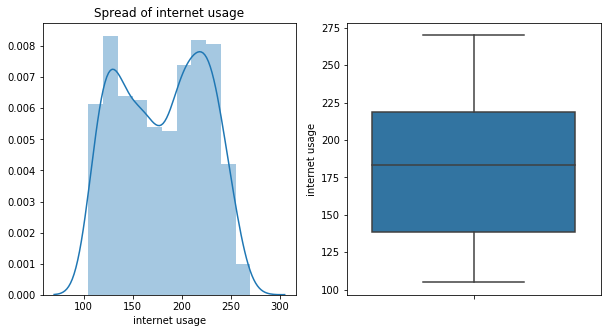

In [44]:
def distplot(df,x):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(df[x])
    plt.title('Spread of '+x)
    plt.subplot(1,2,2)
    sns.boxplot(y=df[x])
    plt.show()
    
for column in data.select_dtypes(include=['int64','float64']):
    if column != 'outcome' and column != 'male':
        distplot(data,column)
    

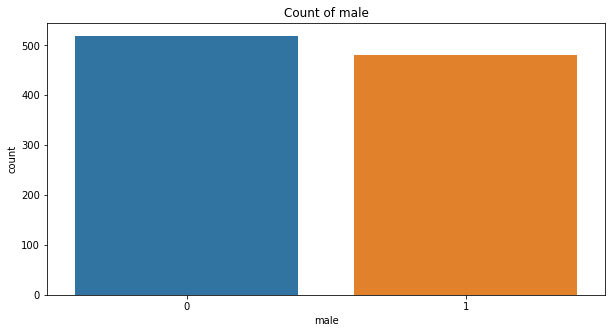

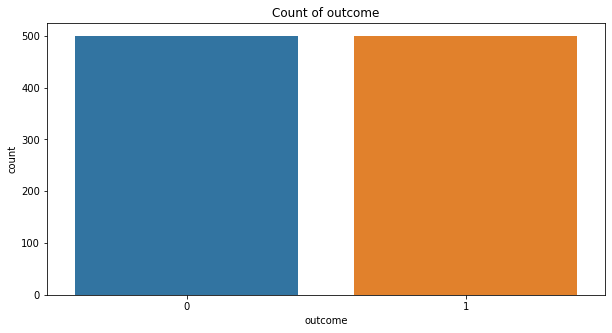

In [45]:
def count(df,x):
    plt.figure(figsize=(10,5))
    sns.countplot(df[x])
    plt.title('Count of '+x)
    plt.show()

    
count(data,'male')
count(data,'outcome')

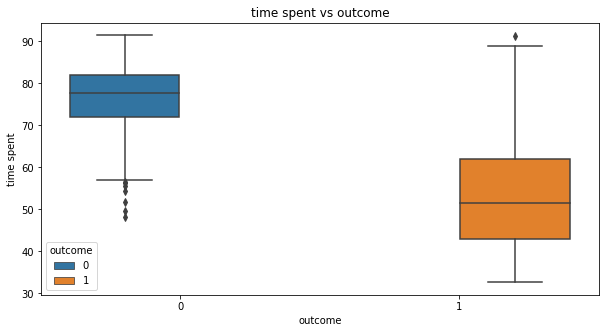

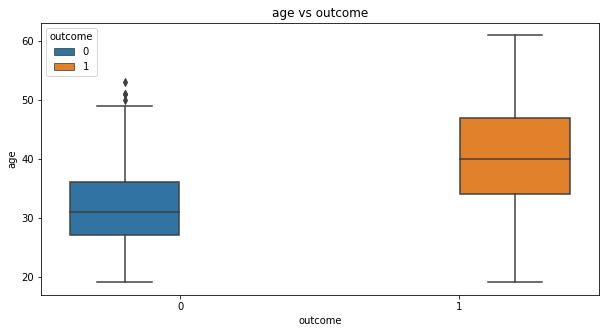

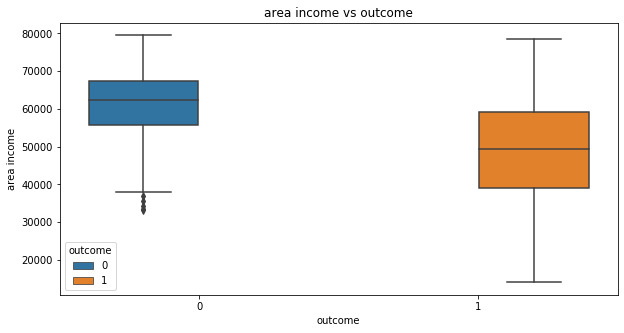

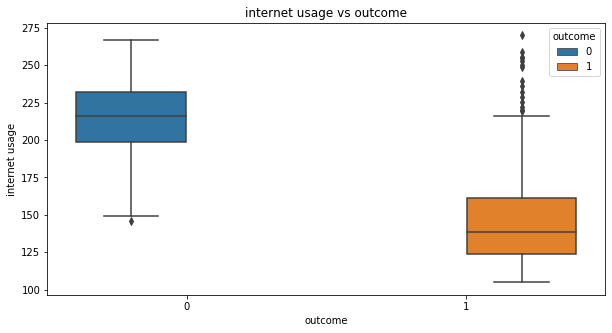

In [46]:
def boxplot(df,x):
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df['outcome'],y=df[x],hue=data.outcome)
    plt.title(x+' vs outcome')
    plt.show()
    
for column in data.select_dtypes(include=['int64','float64']):
    if column != 'outcome' and column != 'male':
        boxplot(data,column)
        

## Frequency distribution 

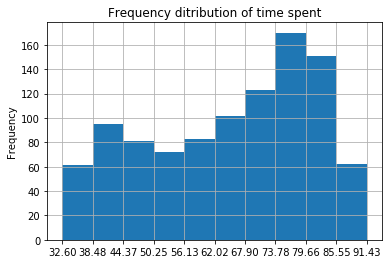

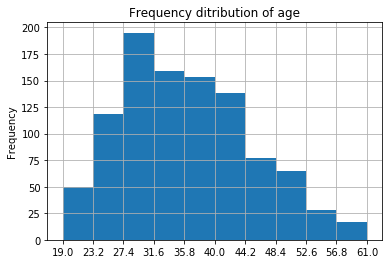

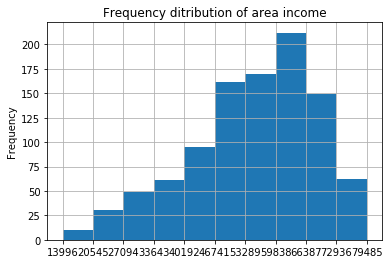

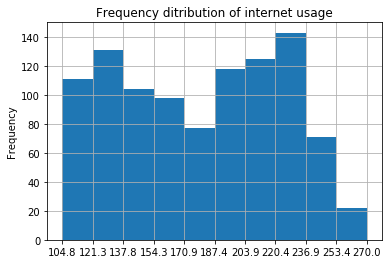

In [51]:
def histplot(df,x):
    count,bins_edges = np.histogram(data[x])
    data[x].plot(kind='hist',xticks=bins_edges)
    plt.grid()
    plt.title('Frequency ditribution of '+x)
    plt.show()
    
for column in data.select_dtypes(include=['int64','float64']):
    if column != 'outcome' and column != 'male':
        histplot(data,column)

### Most Common Countries

In [59]:
data['country'].mode()

0    Czech Republic
1            France
dtype: object

### Most Common city

In [60]:
data['city'].mode()

0       Lisamouth
1    Williamsport
dtype: object

### Average value of continous features On behalf of outcome

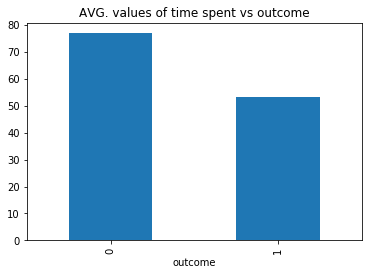

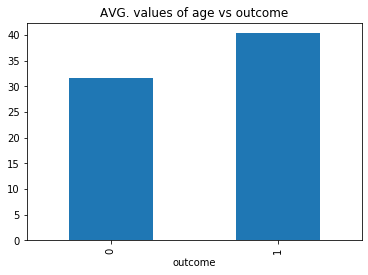

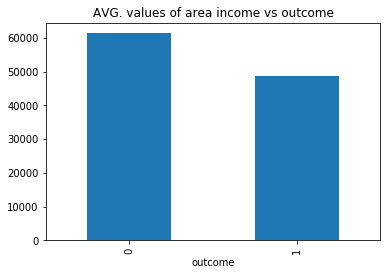

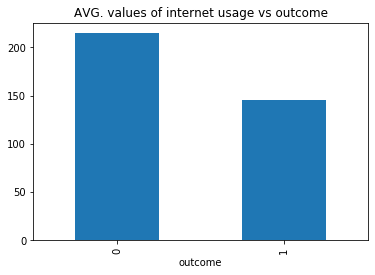

In [65]:
def feature_vs_outcome(df,x):
    plot1 = df.groupby(['outcome'])[x].mean()
    plot1.plot(kind='bar')
    plt.title('AVG. values of '+x+' vs outcome')
    plt.show()

for column in data.select_dtypes(include=['int64','float64']):
    if column != 'male' and column != 'outcome':
        feature_vs_outcome(data,column)

In [66]:
data.head()

,time spent,age,area income,internet usage,ad topic line,city,male,country,timestamp,outcome
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


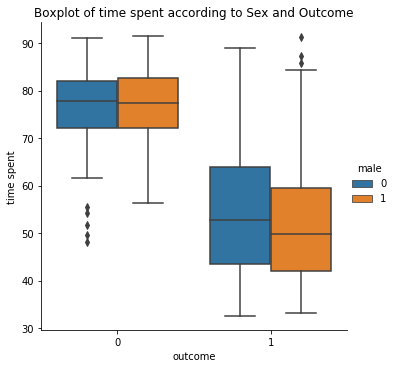

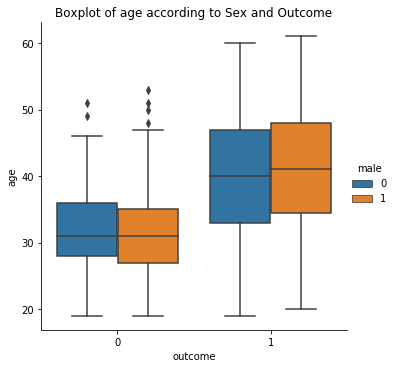

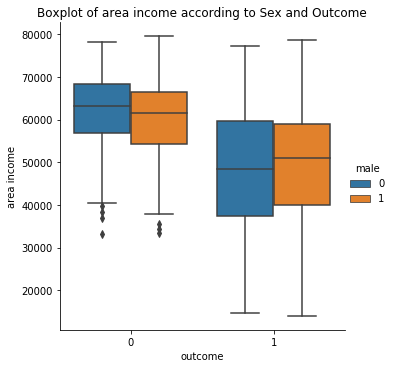

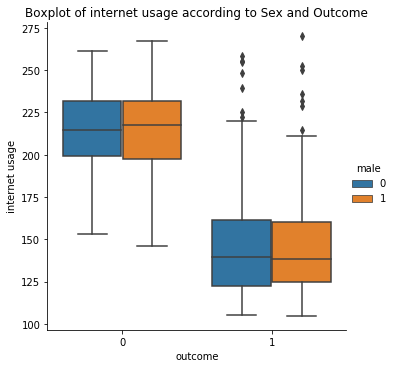

In [86]:
def catplot(df,y):
    sns.catplot(x='outcome',y=y,hue='male',data=data,kind='box')
    plt.title('Boxplot of '+y+' according to Sex and Outcome')
    plt.show()

for column in data.select_dtypes(include=['int64','float64']):
    if column != 'male' and column != 'outcome':
        catplot(data,column)

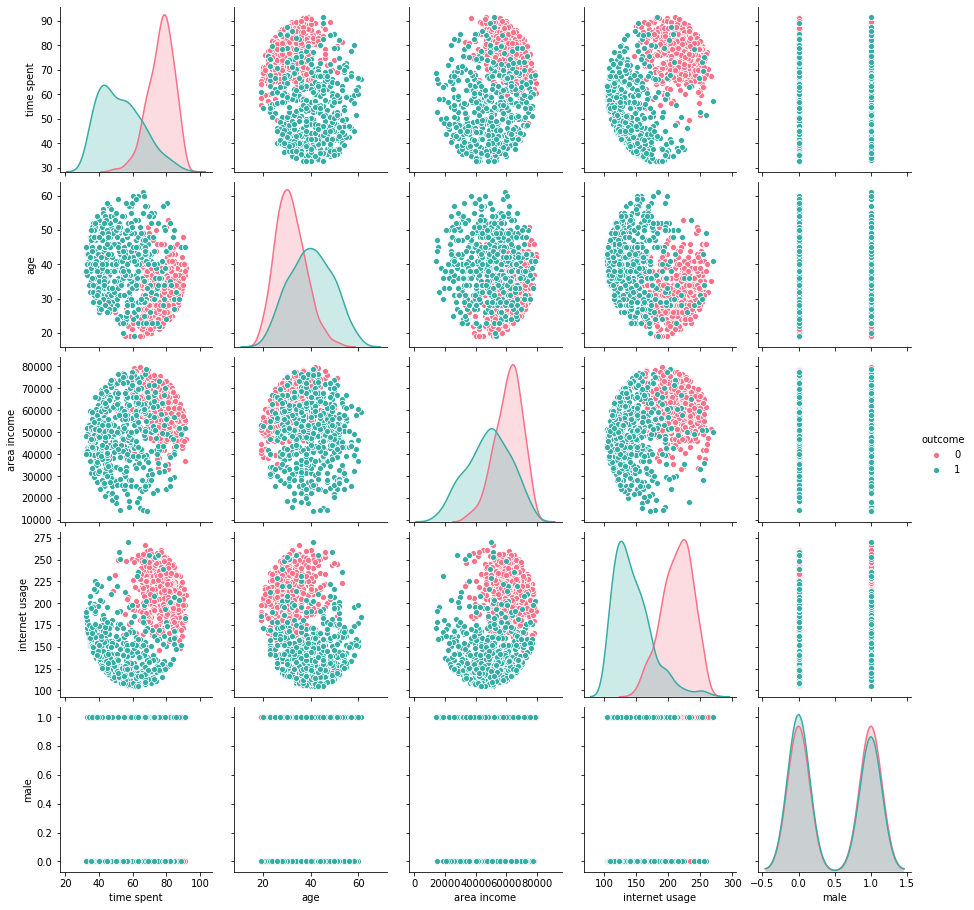

In [89]:
sns.pairplot(data,hue='outcome',palette='husl')

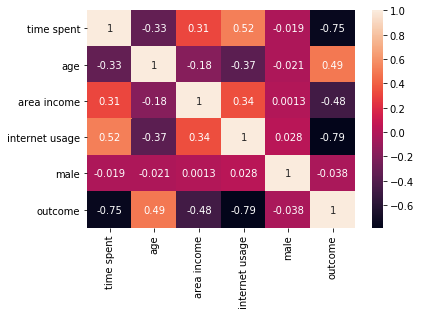

In [91]:
sns.heatmap(data.corr(),annot=True)

# Logistic Regression Model

### Split data into train and test

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,classification_report,plot_confusion_matrix,plot_roc_curve


In [93]:
data.columns

Index(['time spent', 'age', 'area income', 'internet usage', 'ad topic line',
       'city', 'male', 'country', 'timestamp', 'outcome'],
      dtype='object')

In [94]:
X = data[['time spent', 'age', 'area income', 'internet usage','male']]
y = data['outcome']


In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
print("Training Score: ",logr.score(X_train,y_train))
print("Testing Score: ",logr.score(X_test,y_test))

Training Score:  0.9653333333333334
Testing Score:  0.976


In [109]:
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Recall_score: ",recall_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))

Confusion Matrix: 
 [[114   1]
 [  8 127]]
Recall_score:  0.9407407407407408
Precision:  0.9921875


In [110]:
print("Classification report:",classification_report(y_test,y_pred))
print("Accuracy_score",accuracy_score(y_test,y_pred))

Classification report:               precision    recall  f1-score   support

           0       0.93      0.99      0.96       115
           1       0.99      0.94      0.97       135

    accuracy                           0.96       250
   macro avg       0.96      0.97      0.96       250
weighted avg       0.97      0.96      0.96       250

Accuracy_score 0.964


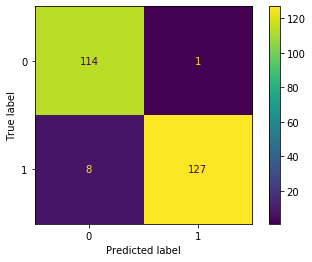

In [111]:
plot_confusion_matrix(logr,X_test,y_test)

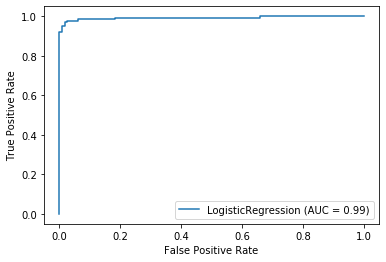

In [112]:
plot_roc_curve(logr,X_test,y_test)

# Random Forest Model

In [116]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
# Predict using model
y_pred_rf = rf.predict(X_test)
print("ACcuracy: ",accuracy_score(y_test, rf_training_pred))


ACcuracy:  0.984


# Logistic Regression Scratch Model

In [4]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [35]:
def hypothesis(X,theta):
    z = np.dot(X,theta)
    hx = 1/(1+np.exp(-z))
    return hx
            

In [36]:
def costfunction(theta,X,y,lambd):
    m,n = X.shape
    theta = theta.reshape((n,1))
    hx = hypothesis(X,theta)
    j = (-1/m)*np.sum((y*np.log(hx))+((1-y)*np.log(1-hx))) +(lambd/(2*m)*np.sum(theta[1:]**2))
    return j


In [71]:
def gradient(theta,X,y,lambd):
    m,n = X.shape
    theta=theta.reshape((n,1))
    hx = hypothesis(X,theta)
    grad = np.zeros_like(theta)
    
    grad[0] = (1/m)*(X.T.dot(hx-y))[0]
    grad[1:] = (1/m)*(X.T.dot(hx-y))[1:] + (lambd/m)*theta[1:]
    return grad

    

## Main()

In [72]:
data.head()

,time spent,age,area income,internet usage,ad topic line,city,male,country,timestamp,outcome
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [73]:
X = np.array(data[['time spent', 'age', 'area income', 'internet usage','male']])
y = np.array(data['outcome']).reshape(-1,1)
X = np.c_[np.ones((len(X),1)),X]


In [74]:
from scipy.optimize import fmin_tnc

In [90]:
m,n = X.shape
lambd  = 0.01
theta_initial = np.zeros((n))


In [91]:
theta = fmin_tnc(func=costfunction,x0=theta_initial,fprime=gradient,args=(X,y,lambd))

E:\anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
E:\anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [92]:
theta[0]

array([ 2.70706493e+01, -1.90370901e-01,  1.71160832e-01, -1.34906307e-04,
       -6.33079784e-02, -4.11926905e-01])

In [93]:
hx = hypothesis(X,theta[0].reshape((n,1)))
threshold = 0.5
prediction = np.select([hx>=threshold,hx<threshold],[1,0])

In [94]:
accuracy = np.mean(prediction==y)*100
accuracy

97.2